<a href="https://colab.research.google.com/github/Itsmrk/Deep_learning/blob/master/07_Dogs_vs_Cats_Img_Classification_Without_ImgAugmentation(activation%3D'sigmoid').ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing packages**

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [0]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# **Data Loading**

In [5]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

68608000/68606236 [==============================] - 1s 0us/step


In [6]:
#We can list the directories with the following terminal command:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs


In [0]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

## **Understanding our data**

In [0]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [9]:
print("Total Traning Cats : ", num_cats_tr)
print("Total Traning Dogs : ", num_dogs_tr)

print("Total Validation Cats : ", num_cats_val)
print("Total Validation Dogs : ", num_dogs_val)

print("---------")

print("Total Traning Images : ", total_train)
print("Total Validating Images : ", total_val)

Total Traning Cats :  1000
Total Traning Dogs :  1000
Total Validation Cats :  500
Total Validation Dogs :  500
---------
Total Traning Images :  2000
Total Validating Images :  1000


# **Setting Model Parameters**

In [0]:
BATCH_SIZE = 100
IMG_SHAPE = 150

# **Data Preparation**

In [0]:
train_img_generator = ImageDataGenerator(rescale=1./255)
validation_img_generator = ImageDataGenerator(rescale=1./255)

In [12]:
train_data_gen = train_img_generator.flow_from_directory(directory = train_dir,
                                                         target_size =(IMG_SHAPE,IMG_SHAPE),
                                                         class_mode = 'binary',
                                                         batch_size = BATCH_SIZE,
                                                         shuffle = True,
                                                         )

Found 2000 images belonging to 2 classes.


In [13]:
val_data_gen = validation_img_generator.flow_from_directory(directory = validation_dir,
                                                         target_size =(IMG_SHAPE,IMG_SHAPE),
                                                         class_mode = 'binary',
                                                         batch_size = BATCH_SIZE,
                                                         shuffle = True,
                                                         )

Found 1000 images belonging to 2 classes.


## **Visualizing Training images**

In [0]:
sample_training_images, _ = next(train_data_gen) 

In [0]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

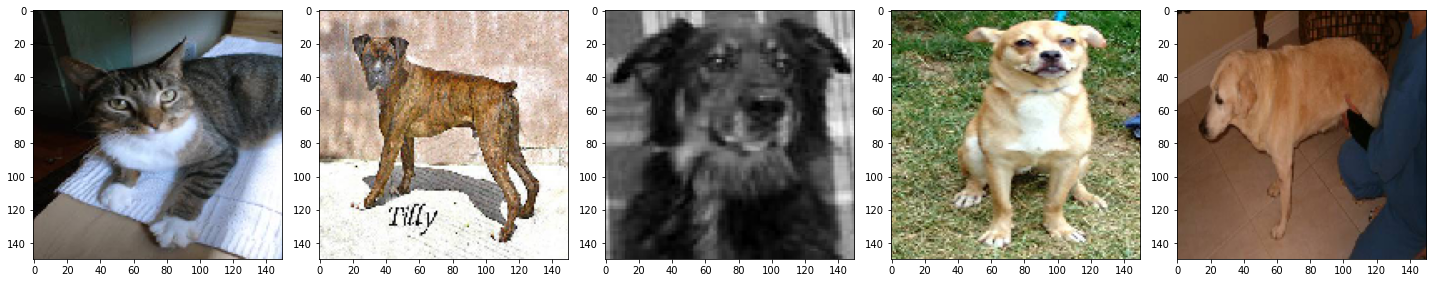

In [16]:
plotImages(sample_training_images[:5])

# **Model Creation**

## **Define the model**

In [0]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape = (150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

### **Compile the model**

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics =['accuracy'])

### **Model Summary**

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

### **Train the model**

In [20]:
EPOCHS = 100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch = int(np.ceil(total_train/float(BATCH_SIZE))),
    epochs = EPOCHS,
    validation_data = val_data_gen,
    validation_steps = int(np.ceil(total_val/ float(BATCH_SIZE)))
)

Epoch 1/100
20/20 [==============================] - 9s 463ms/step - loss: 0.7053 - accuracy: 0.5070 - val_loss: 0.6862 - val_accuracy: 0.5290
Epoch 2/100
20/20 [==============================] - 9s 465ms/step - loss: 0.6887 - accuracy: 0.5320 - val_loss: 0.6820 - val_accuracy: 0.5270
Epoch 3/100
20/20 [==============================] - 9s 466ms/step - loss: 0.6860 - accuracy: 0.5570 - val_loss: 0.6857 - val_accuracy: 0.5130
Epoch 4/100
20/20 [==============================] - 9s 459ms/step - loss: 0.6665 - accuracy: 0.5865 - val_loss: 0.6446 - val_accuracy: 0.6300
Epoch 5/100
20/20 [==============================] - 9s 462ms/step - loss: 0.6412 - accuracy: 0.6375 - val_loss: 0.6323 - val_accuracy: 0.6480
Epoch 6/100
20/20 [==============================] - 9s 454ms/step - loss: 0.6133 - accuracy: 0.6675 - val_loss: 0.6063 - val_accuracy: 0.6770
Epoch 7/100
20/20 [==============================] - 9s 458ms/step - loss: 0.5680 - accuracy: 0.7115 - val_loss: 0.5810 - val_accuracy: 0.7190

### **Visualizing results of the training**

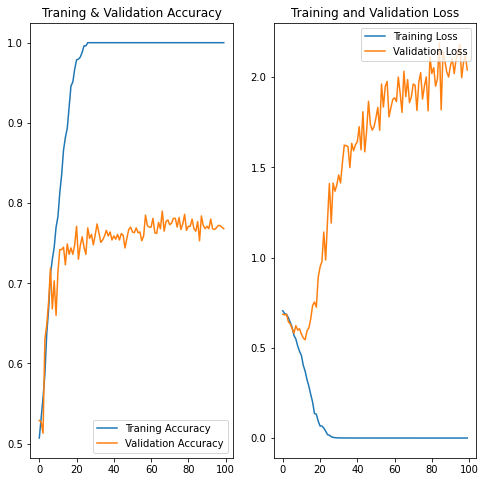

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc ,label='Traning Accuracy')
plt.plot(epochs_range, val_acc, label= 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Traning & Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
#plt.savefig('./foo.png')
plt.show()